# Loading the Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Loading the Dataset

In [2]:
# The code was removed by Watson Studio for sharing.

Month  Total Gallons
0 2012-01-01     1729505300
1 2012-02-01     1512256300
2 2012-03-01     1648251343
3 2012-04-01     1766880389
4 2012-05-01     2212475768

In [3]:
# Parsing the dataset from the string to the DateTime
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])


In [4]:
from datetime import datetime
indexedDataset.head()

Total Gallons
Month                    
2012-01-01     1729505300
2012-02-01     1512256300
2012-03-01     1648251343
2012-04-01     1766880389
2012-05-01     2212475768

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


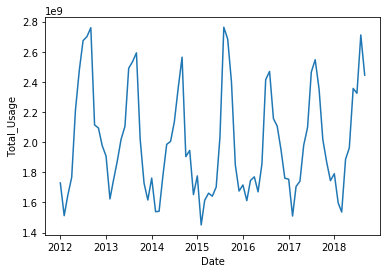

In [5]:
plt.xlabel('Date')
plt.ylabel('Total_Usage')
plt.plot(indexedDataset)

# Determining the Rolling Statistics

In [6]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Total Gallons
Month                    
2012-01-01            NaN
2012-02-01            NaN
2012-03-01            NaN
2012-04-01            NaN
2012-05-01            NaN
2012-06-01            NaN
2012-07-01            NaN
2012-08-01            NaN
2012-09-01            NaN
2012-10-01            NaN
2012-11-01            NaN
2012-12-01   2.139087e+09
2013-01-01   2.153899e+09
2013-02-01   2.163164e+09
2013-03-01   2.171367e+09
2013-04-01   2.180424e+09
2013-05-01   2.164303e+09
2013-06-01   2.133101e+09
2013-07-01   2.117844e+09
2013-08-01   2.104010e+09
2013-09-01   2.090106e+09
2013-10-01   2.081986e+09
2013-11-01   2.051455e+09
2013-12-01   2.021358e+09
2014-01-01   2.009241e+09
2014-02-01   2.002199e+09
2014-03-01   1.985051e+09
2014-04-01   1.977031e+09
2014-05-01   1.974244e+09
2014-06-01   1.965941e+09
...                   ...
2016-04-01   1.966249e+09
2016-05-01   1.968638e+09
2016-06-01   1.981472e+09
2016-07-01   2.013289e+09
2016-08-01   1.988869e+09
2016-09-01  

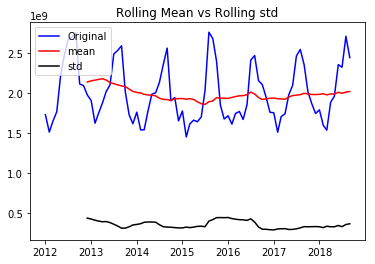

In [7]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean= plt.plot(rolmean,color='red',label='mean')
std = plt.plot(rolstd,color='black',label='std')
plt.legend(loc='best')
plt.title('Rolling Mean vs Rolling std')
plt.show(block=False)

# Performing the Dickey-Fuller Test

In [8]:
print('Result of Dickey-Fuller Test: ')
dftest=adfuller(indexedDataset['Total Gallons'],autolag='AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print (dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                 -2.094781
p-value                         0.246618
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


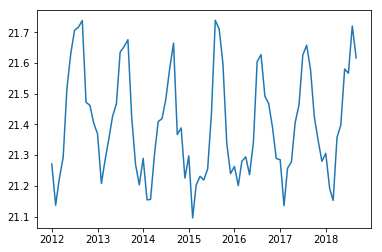

In [9]:
#Estimating the trends
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

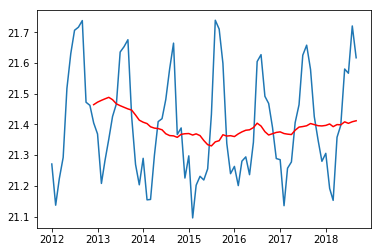

In [10]:
#Estimating the Moving Average

movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [11]:
datasetminusMovingAvg=indexedDataset_logScale-movingAverage
datasetminusMovingAvg.head()

#Remove the NaN value
datasetminusMovingAvg.dropna(inplace=True)
datasetminusMovingAvg.head(10)

Total Gallons
Month                    
2012-12-01      -0.059425
2013-01-01      -0.103688
2013-02-01      -0.270717
2013-03-01      -0.202372
2013-04-01      -0.136159
2013-05-01      -0.054834
2013-06-01       0.000354
2013-07-01       0.174777
2013-08-01       0.197466
2013-09-01       0.225407

# Function for the Stationary Test

In [12]:
def test_stationary(timeseries):
    
    #Determine rolling Statistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #plotting the rolling statistics
    orig=plt.plot(indexedDataset,color='blue',label='Original')
    mean= plt.plot(rolmean,color='red',label='mean')
    std = plt.plot(rolstd,color='black',label='std')
    plt.legend(loc='best')
    plt.title('Rolling Mean vs Rolling std')
    plt.show(block=False)
    
    #performing the Dickey-Fuller Test
    dftest=adfuller(indexedDataset['Total Gallons'],autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

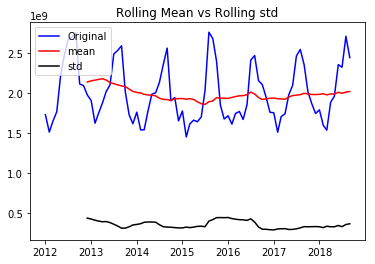

Test Statistic                 -2.094781
p-value                         0.246618
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [13]:
test_stationary(datasetminusMovingAvg)

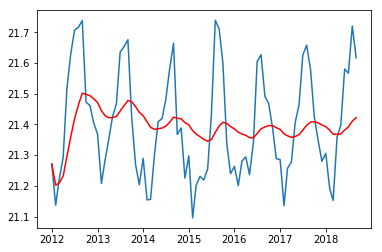

In [14]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

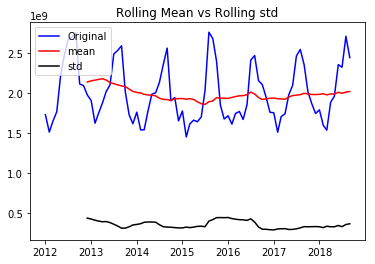

Test Statistic                 -2.094781
p-value                         0.246618
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [15]:
datasetLogScaleMinusExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusExponentialDecayAverage)

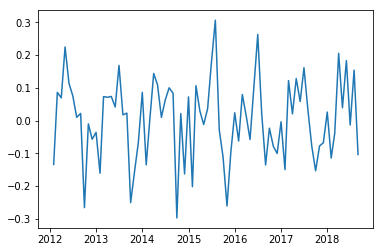

In [16]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

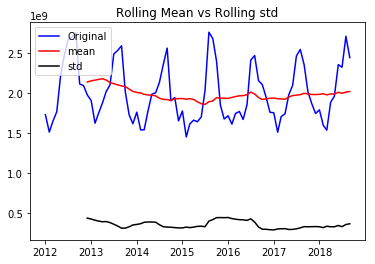

Test Statistic                 -2.094781
p-value                         0.246618
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [17]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

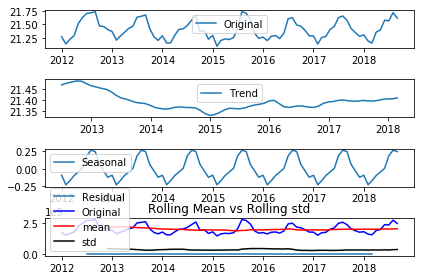

Test Statistic                 -2.094781
p-value                         0.246618
#Lags Used                     11.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [18]:
decomposition=seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()


decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

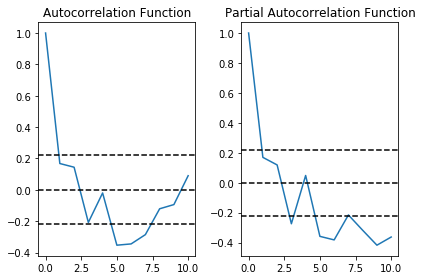

In [19]:
#ACF and PACF plots:

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA Model

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting the ARIMA Model


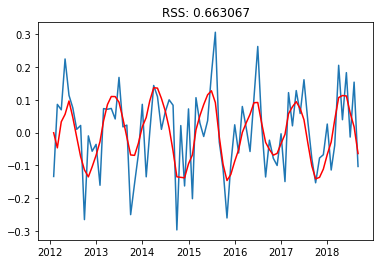

In [20]:
# ARIMA Model
model =ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Total Gallons'])**2))
print('Plotting the ARIMA Model')

In [21]:
prediction_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
prediction_ARIMA_diff.head()

Month
2012-02-01   -0.000625
2012-03-01   -0.046793
2012-04-01    0.032846
2012-05-01    0.055705
2012-06-01    0.096468
dtype: float64

In [22]:
prediction_ARIMA_diff_cumsum=prediction_ARIMA_diff.cumsum()
prediction_ARIMA_diff_cumsum.head()

Month
2012-02-01   -0.000625
2012-03-01   -0.047417
2012-04-01   -0.014571
2012-05-01    0.041134
2012-06-01    0.137603
dtype: float64

In [23]:
prediction_ARIMA_log=pd.Series(indexedDataset_logScale['Total Gallons'].ix[0], index=indexedDataset_logScale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Month
2012-01-01    21.271101
2012-02-01    21.270477
2012-03-01    21.223684
2012-04-01    21.256530
2012-05-01    21.312235
dtype: float64

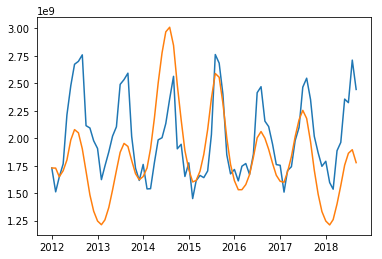

In [24]:
prediction_ARIMA=np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(prediction_ARIMA)

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


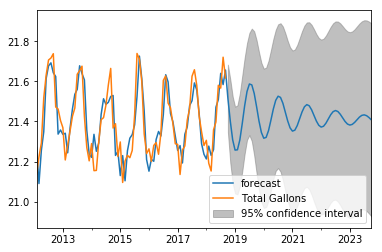

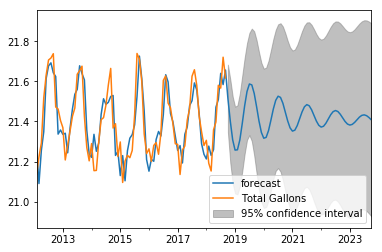

In [25]:
results_ARIMA.plot_predict(1,141)


In [26]:
print('RMSE: %.4f'% np.sqrt(sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Total Gallons'])**2)/len(datasetLogDiffShifting['Total Gallons'])))

RMSE: 0.0910


In [27]:
!pip install cloudant


     |████████████████████████████████| 81kB 6.6MB/s eta 0:00:011


In [28]:
from cloudant import Cloudant
client = None
db=None
user="eb77e38a-dd5d-46c0-9359-e13fb22f08e3-bluemix"
password="03b0c68c664a33b189567be189f45af3f639c664ddacd7bdf03f1b61c8c64cb4"
url="https://eb77e38a-dd5d-46c0-9359-e13fb22f08e3-bluemix.cloudantnosqldb.appdomain.cloud"
client= Cloudant(user,password,url=url,connect=True)
db=client.create_database('prediction_db',throw_on_exists=False)


In [29]:
x=results_ARIMA.forecast(steps=36)

In [30]:
import time
month=1
year=2019
for item in x[0]:
    obj={'date':str(year)+'-'+str(month)+'-01','predicted_value':item}
    month=month+1
    if(month>12):
        month=1
        year=year+1
    my_document=db.create_document(obj)
    obj['_id']=my_document['_id']
    time.sleep(1)
    print(obj['_id'])




2f95b6794f7c610d9d70c7ed4147deb6
642c35ea35bbd2871d7b821648befe6a
728329e7273a039569e68006b37966af
728329e7273a039569e68006b3796b3c
a26a3a455943e8761fac6980c9d4a2e0
728329e7273a039569e68006b379753b
a26a3a455943e8761fac6980c9d4a8cd
0717960aae1d9f9fcd53492f54dc41f9
728329e7273a039569e68006b37a86b3
2f95b6794f7c610d9d70c7ed41487d11
0717960aae1d9f9fcd53492f54e48b5a
265cf3e870d7c144ac250b4692e2f1fc
b2eda87dee5d2afbbcc0ee66695453aa
31a257f944a74529e1a055b57b3f0f62
2f95b6794f7c610d9d70c7ed414887c8
728329e7273a039569e68006b37b5c3a
2f95b6794f7c610d9d70c7ed41489bfb
a26a3a455943e8761fac6980c9e2e3b5
0e9fcdebfd35e390033100ca98188501
2f95b6794f7c610d9d70c7ed4148b9b1
0e9fcdebfd35e390033100ca981886e3
728329e7273a039569e68006b37b662e
728329e7273a039569e68006b37b7f92
2f95b6794f7c610d9d70c7ed4148d391
0e9fcdebfd35e390033100ca98189f50
a9d4ff829e19f29142dddbdd2bc7a887
0717960aae1d9f9fcd53492f54e49e7f
48e1715605c7a76b46f9e8c7bbeb9666
642c35ea35bbd2871d7b821648bf4b62
a9d4ff829e19f29142dddbdd2bc7c25b
a26a3a4559

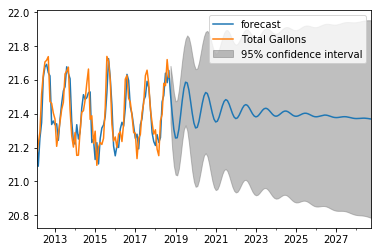

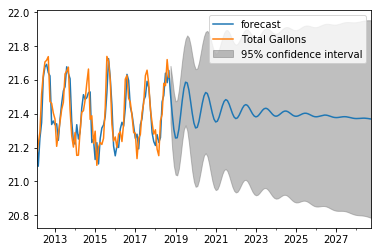

In [43]:
results_ARIMA.plot_predict(1,201)